In [48]:
import pandas as pd 
df=pd.read_csv("CNNBFS.csv");
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
df.head(5)
tc=550;
tc=tc+1

print(df.head())

                                                code  tag
0  35 105 110 99 108 117 100 101 60 98 105 116 11...    1
1  35 105 110 99 108 117 100 101 60 98 105 116 11...    1
2  35 105 110 99 108 117 100 101 60 98 105 116 11...    1
3  35 105 110 99 108 117 100 101 60 98 105 116 11...    1
4  35 105 110 99 108 117 100 101 60 98 105 116 11...    1


In [50]:
trainX,train_Y=df['code'],df['tag']

In [51]:
tmp=[]
for i in trainX:
    k=i.split()
    if(len(k)==550):
        k.append(0)
    
        
    a=np.array(k)
    a=a.astype('float32')
    
    
    a=a.reshape(tc,1)
    tmp.append(a)
train_X=np.array(tmp)
train_X.shape
type(train_X[1][1][0])



numpy.float32

In [52]:


train_X.shape

(169, 551, 1)

In [53]:
train_X=train_X/155 
train_X

array([[[ 0.22580644],
        [ 0.67741936],
        [ 0.7096774 ],
        ..., 
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.22580644],
        [ 0.67741936],
        [ 0.7096774 ],
        ..., 
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.22580644],
        [ 0.67741936],
        [ 0.7096774 ],
        ..., 
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       ..., 
       [[ 0.22580644],
        [ 0.67741936],
        [ 0.7096774 ],
        ..., 
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.22580644],
        [ 0.67741936],
        [ 0.7096774 ],
        ..., 
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.22580644],
        [ 0.67741936],
        [ 0.7096774 ],
        ..., 
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]], dtype=float32)

In [54]:
train_X = train_X.reshape(-1, tc,1, 1)
train_X.shape

(169, 551, 1, 1)

In [55]:
from keras.utils import to_categorical

In [56]:
train_Y_one_hot = to_categorical(train_Y)
#test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[2])
print('After conversion to one-hot:', train_Y_one_hot[2])


Original label: 1
After conversion to one-hot: [ 0.  1.]


In [57]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.15, random_state=13)

In [58]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((143, 551, 1, 1), (26, 551, 1, 1), (143, 2), (26, 2))

In [59]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [60]:
batch_size = 64
epochs = 25
num_classes = 2

In [61]:
binary_model = Sequential()
binary_model.add(Conv2D(16, kernel_size=(4, 1),activation='linear',input_shape=(tc,1,1),padding='same'))
binary_model.add(LeakyReLU(alpha=0.1))
binary_model.add(MaxPooling2D((2, 1),padding='same'))
binary_model.add(Dropout(0.2))
binary_model.add(Conv2D(32, (2, 1), activation='linear',padding='same'))
binary_model.add(LeakyReLU(alpha=0.1))
binary_model.add(MaxPooling2D(pool_size=(2, 1),padding='same'))
binary_model.add(Dropout(0.2))
binary_model.add(Flatten())
binary_model.add(Dense(128, activation='linear'))
binary_model.add(LeakyReLU(alpha=0.1))                  
binary_model.add(Dense(num_classes, activation='softmax'))

In [62]:
binary_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [63]:
binary_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 551, 1, 16)        80        
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 551, 1, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 276, 1, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 276, 1, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 276, 1, 32)        1056      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 276, 1, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 138, 1, 32)        0         
__________

In [64]:
binary_train = binary_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 143 samples, validate on 26 samples
Epoch 1/25
143/143 [==============================] - 1s 5ms/step - loss: 0.7920 - acc: 0.4965 - val_loss: 0.6588 - val_acc: 0.6538
Epoch 2/25
143/143 [==============================] - 0s 2ms/step - loss: 0.6385 - acc: 0.6364 - val_loss: 0.6085 - val_acc: 0.6923
Epoch 3/25
143/143 [==============================] - 0s 2ms/step - loss: 0.6058 - acc: 0.6923 - val_loss: 0.6013 - val_acc: 0.6538
Epoch 4/25
143/143 [==============================] - 0s 2ms/step - loss: 0.5995 - acc: 0.6853 - val_loss: 0.5877 - val_acc: 0.6538
Epoch 5/25
143/143 [==============================] - 0s 2ms/step - loss: 0.5782 - acc: 0.6853 - val_loss: 0.5480 - val_acc: 0.6538
Epoch 6/25
143/143 [==============================] - 0s 2ms/step - loss: 0.5650 - acc: 0.6993 - val_loss: 0.5310 - val_acc: 0.6923
Epoch 7/25
143/143 [==============================] - 0s 2ms/step - loss: 0.5331 - acc: 0.6993 - val_loss: 0.5244 - val_acc: 0.6538
Epoch 8/25
143/143 [===========

In [65]:
test_eval =binary_model.evaluate(train_X, train_label, verbose=0)

In [66]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.305587570255
Test accuracy: 0.902097902515


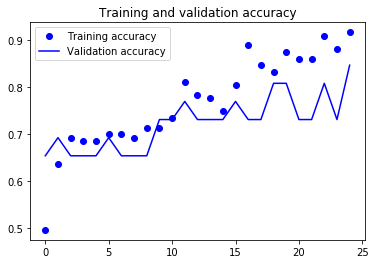

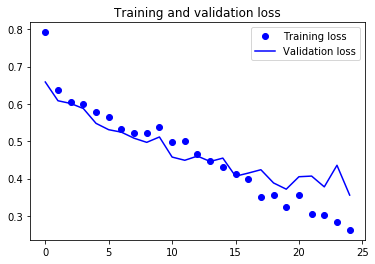

In [67]:
accuracy = binary_train.history['acc']
val_accuracy = binary_train.history['val_acc']
loss = binary_train.history['loss']
val_loss = binary_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [68]:
from sklearn.metrics import classification_report
predicted_classes=binary_model.predict(valid_X)
#print(predicted_classes)

In [69]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [70]:
predicted_classes


array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0], dtype=int64)

In [71]:
actual= np.argmax(np.round(valid_label),axis=1)

In [72]:
actual

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0], dtype=int64)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(predicted_classes,actual))

             precision    recall  f1-score   support

          0       0.93      0.82      0.87        17
          1       0.73      0.89      0.80         9

avg / total       0.86      0.85      0.85        26



In [74]:

def cleanData(c):
    code=c
    df1 = pd.DataFrame({'A':[code]})
            
    df1 = df1.replace('\n',' ', regex=True)
    df1 = df1.replace('\t',' ', regex=True)
    df1 = df1.replace('\r',' ', regex=True)
    df1 = df1.replace(',',' ', regex=True)
    c=0
    tmp=""
    for i in df1['A']:
                c=0
                aa=i.split()
                ff=0
                #print(aa)
                for it in aa:
                    if "int" or "void" in it:
                        ff=1
                        #print("While found at",it)
                    if ff==1:
                        for xx in it:
                            
                            if c<=550:
                                tmp=tmp+str(ord(xx))+' '
                                #print(ord(xx),end=' ')
                                c=c+1
                    
                while(c<=550):
                    tmp=tmp+"0 "
                    #print(0,end=' ')
                    c=c+1
                        
               
            
    #print(ff)          
    return tmp
            
    
    

In [75]:
def makeCNNReady(c):
    tmp=[]
    tmp=c.split()
    aa=np.array(tmp)
    aa=aa.astype('float32')
    
    aa=aa.reshape(tc,1)
    aa=aa.reshape(-1,tc,1,1)
    aa=aa/155
    return aa

In [76]:
def getPrediction(c):
    pred=binary_model.predict(makeCNNReady(cleanData(c)))
    print(pred)
    #cc=np.argmax(np.round(pred),axis=1)
    if pred[0][1]>=pred[0][0]:
        return "yes"
    else:
        return "no"

In [77]:
code="""
#include<bits/stdc++.h>
#define N 1005
using namespace std;
int n,m,S,T,to[N<<1],hd[N<<1],lk[N],cnt,d1[N],d2[N],q[N],h,t,qwq,ans;
bool mp[N][N];
inline void add(int u,int v)
{mp[u][v]=1,to[++cnt]=v,hd[cnt]=lk[u],lk[u]=cnt;}
inline void bfs(int x,int *a)
{
    q[h=0]=x,t=1,a[x]=0;
    while(h<t)
    {
        x=q[h++];
        for(int s,i=lk[x];i;i=hd[i])
        if(a[s=to[i]]>a[x]+1)
        q[t++]=s,a[s]=a[x]+1;
    }
}
int u,v;
int main()
{
	scanf("%d%d%d%d",&n,&m,&S,&T);
	while(m--)
    {
        scanf("%d%d",&u,&v),
        add(u,v),add(v,u);
    }
    memset(d1,0x3f,sizeof d1);
    memset(d2,0x3f,sizeof d2);
    bfs(S,d1),bfs(T,d2);
    qwq=d1[T];
    for(int i=1;i<=n;i++)
    for(int j=i+1;j<=n;j++)
    if(!mp[i][j])
        if(d1[i]+d2[j]+1>=qwq&&d2[i]+d1[j]+1>=qwq)
        ans++;
    cout<<ans;
}

"""

In [78]:
#cleanData(code)
getPrediction(code)


[[ 0.41713935  0.58286059]]


'yes'

In [79]:
code="""

#include <iostream>
#include <cstdio>
#include <algorithm>
#include <cstring>
using namespace std;
const int maxn = 2e5+8;
int n,a[maxn],dp1[maxn],len1[maxn],dp2[maxn],h1[maxn],h2[maxn],len2[maxn];
int main(){
    scanf("%d",&n);
    for(int i = 1;i <= n;++i)
        scanf("%d",&a[i]),a[i] -= i;
    int mx = 1;
    memset(dp1,0x3f,sizeof(dp1));
    for(int i = 1;i <= n;++i){
        int idx = upper_bound(dp1+1,dp1+1+n,a[i]) - dp1;
        dp1[idx] = a[i];
        mx = max(mx,idx);
        len1[i] = mx;
        h1[i] = dp1[mx];
    }
    memset(dp2,0x3f,sizeof(dp2));
    mx = 1;
    for(int i = n;i >= 1;--i){
        int idx = upper_bound(dp2+1,dp2+1+n,-a[i]-1) - dp2;
        dp2[idx] = -a[i]-1;
        mx = max(mx,idx);
        len2[i] = mx;
        h2[i] = dp2[mx];
    }
    dp1[0] = 0;dp2[0] = -2;
    int ans = max(len1[n],len2[1]);
    for(int i = 1;i <= n;++i){
        //printf("i:%d len1:%d len2:%d dp1:%d dp2:%d\n",i,len1[i-1],len2[i+1],h1[i-1],h2[i+1]);
        if(h1[i-1] <= -h2[i+1]){
            ans = max(ans,len1[i-1]+len2[i+1]);
        }
    }
    cout<<max(0,n-1-ans)<<endl;
    return 0;
}








"""

In [80]:
getPrediction(code)

[[ 0.51729637  0.4827036 ]]


'no'

In [81]:
code="""
#include<bits/stdc++.h>
using namespace std;
int main()
{

while(t--)
{
cin>>n;
if(n%2==0)
cout<<"Even"<<endl;
else
cout<<"Odd"<<endl;

}
}

"""



In [82]:
getPrediction(code)

[[ 0.68932903  0.310671  ]]


'no'

In [94]:
code="""





"""

In [95]:
#print(cleanData(code))
print(getPrediction(code))


[[ 0.9059701   0.09402997]]
no


In [85]:
tt=makeCNNReady(cleanData(code))


In [86]:
tt.shape

(1, 551, 1, 1)

In [87]:
tt=tt/155

In [88]:
getPrediction(code)

[[ 0.9059701   0.09402997]]


'no'

In [89]:
print(code)



#include<bits/stdc++.h>
using namespace std;
void bfs(int s)
{
queue<int> q;
q.push(s);
while(!q.empty())
{
int x=q.front();
for(int i=0;i<v[x].size();i++)
{
q.push(v[x][i]);
}
}
}
int main()
{
int t,n,k,i,x;
cin>>t;
while(t--)
{
cin>>n>>k;
x=0;
for(i=0;i<n;i++)
{
cin>>a[i];
if(a[i]%2==0)
x=1;
}



}

}







In [90]:
#x=makeCNNReady(cleanData(code))
#print(x)
getPrediction(code)

[[ 0.9059701   0.09402997]]


'no'

In [91]:
code="""

#include<bits/stdc++.h>
using namespace std;
int main()
{
        ios_base::sync_with_stdio(0);
        cin.tie(0);
        cout.tie(0);
        cin>>n>>k;
        for(i=0;i<n;i++)
        cin>>a[i];
        while(i<n)
        {
            if(a[i]==k)
            {
                cout<<i<<endl;
                break;
            }
            i++;
        }
        
        
}






"""


In [92]:
cleanData(code)

'35 105 110 99 108 117 100 101 60 98 105 116 115 47 115 116 100 99 43 43 46 104 62 117 115 105 110 103 110 97 109 101 115 112 97 99 101 115 116 100 59 105 110 116 109 97 105 110 40 41 123 105 111 115 95 98 97 115 101 58 58 115 121 110 99 95 119 105 116 104 95 115 116 100 105 111 40 48 41 59 99 105 110 46 116 105 101 40 48 41 59 99 111 117 116 46 116 105 101 40 48 41 59 99 105 110 62 62 110 62 62 107 59 102 111 114 40 105 61 48 59 105 60 110 59 105 43 43 41 99 105 110 62 62 97 91 105 93 59 119 104 105 108 101 40 105 60 110 41 123 105 102 40 97 91 105 93 61 61 107 41 123 99 111 117 116 60 60 105 60 60 101 110 100 108 59 98 114 101 97 107 59 125 105 43 43 59 125 125 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [93]:
getPrediction(code)

[[ 0.08340008  0.91659993]]


'yes'

In [96]:
binary_model.save("BFS_model.h5")